# 广义回归模型 linear_model

## 1. 普通线性回归类 linear_model.LinearRegression

$$\hat{y} = w_0 + w_1x_1 + .. + w_nx_n$$

- 向量 $w = (w_1,..,w_n)$ 称为 `coef_`
- $w_0$ 称为 `intercept_`
- 目标函数 : $min~||\hat{y} - y||^2$
- `linear_model.LinearRegression()` 创建普通最小二乘线性回归对象。从实现的角度来看，这只是普通的普通最小二乘（scipy.linalg.lstsq）包装为预测对象。

|常用成员函数|解释|
|--|--|
|`fit(train_x, train_y)`|训练模型|
|`predict(test_x)`|预测|
|`score(X,y)`|返回预测的决定系数$R^2$|

|常用成员变量|解释|
|--|--|
|`coef_`|向量 $w = (w_1,..,w_n)$|
|`intercept_`|$w_0$

- [示例代码](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

coef_ :  [938.23786125]
intercept_ :  152.91886182616167
均方误差 ： 2548.0723987259707
Variance score :  -0.37084863968864124


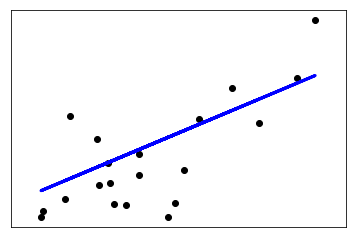

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# 1. 加载数据
diabetes = datasets.load_diabetes()  # 官方提供的数据集
diabetes_X = diabetes.data[:, np.newaxis, 2]  # 本例仅使用一个特征

# 2. 切分训练集和测试集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# 3. 训练线性回归模型
reg = linear_model.LinearRegression()
reg.fit(diabetes_X_train, diabetes_y_train)

# 4. 输出训练得到的回归系数
print('coef_ : ', reg.coef_)
print('intercept_ : ', reg.intercept_)


# 5. 预测并输出一些评价指标
y_hat = reg.predict(diabetes_X_test)
print('均方误差 ：', mean_squared_error(y_hat, diabetes_y_test))
print('Variance score : ', r2_score(y_hat, diabetes_y_test))

# 6. 数据与结果可视化
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, y_hat, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 2. 岭回归 linear_model.Ridge

- 目标函数 $$min~||\hat{y} - y||^2 + \alpha||w||^2$$

In [40]:
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 
print('coef_ : ', ridge.coef_)
print('intercept_ : ', ridge.intercept_)

coef_ :  [0.34545455 0.34545455]
intercept_ :  0.1363636363636364
